In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv('corporate_rating.csv')
X_df = dataset.iloc[:, 5:31]
y_df = dataset.iloc[:, 0]
dataset.dataframeName = 'corporate_rating.csv'

Displaying the dimensions

In [26]:
print("The credit rating dataset has", dataset.shape[0], "records, each with", dataset.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


The Structure of dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

We have 26 columns of numerical data and 6 descriptive columns (one of which is the label).There are no missing values.

In [28]:
dataset.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03/06/15,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


Analyzing the Credit ratings:

There are 10 criterias for Credit rating, ranging from AAA to D. The triple-A (AAA) is the most secure rating a company can receive. On the other hand, the rating D is the less secure. It means the company will likely default on its creditors. 



The number of ratings we have for each criteria in the dataset: 

In [29]:
dataset.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

We observe that the dataset is very unbalanced. We have 671 triple-Bs (BBB) but only 1 D. 

Given the lack of Credit Ratings classified as AAA, CC, C and D we eliminate then from the dataset.

Distribution Graphs (histogram/bar graph) of sampled columns: 

<Axes: title={'center': 'Rating(column 0)'}>

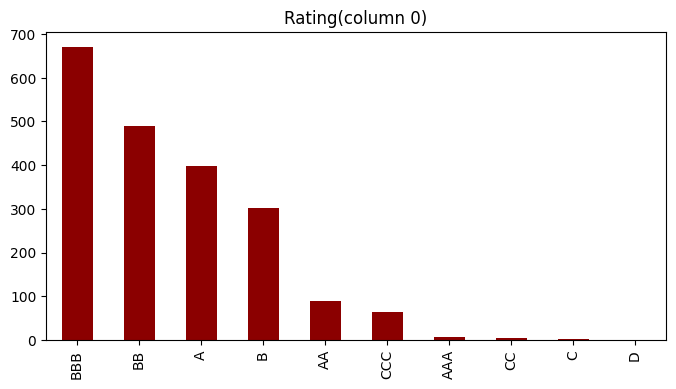

In [30]:
dataset['Rating'].value_counts().plot(kind='bar',figsize=(8,4), title="Rating(column 0)", color="darkred")


<Axes: title={'center': 'Rating Agency Name(column 3)'}>

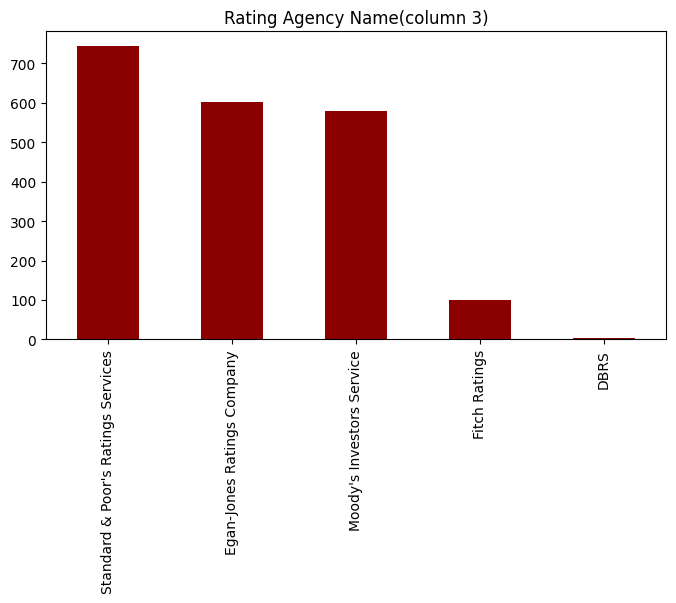

In [31]:
dataset['Rating Agency Name'].value_counts().plot(kind='bar',figsize=(8,4), title="Rating Agency Name(column 3)", color="darkred")


<Axes: title={'center': 'Sector(column 5)'}>

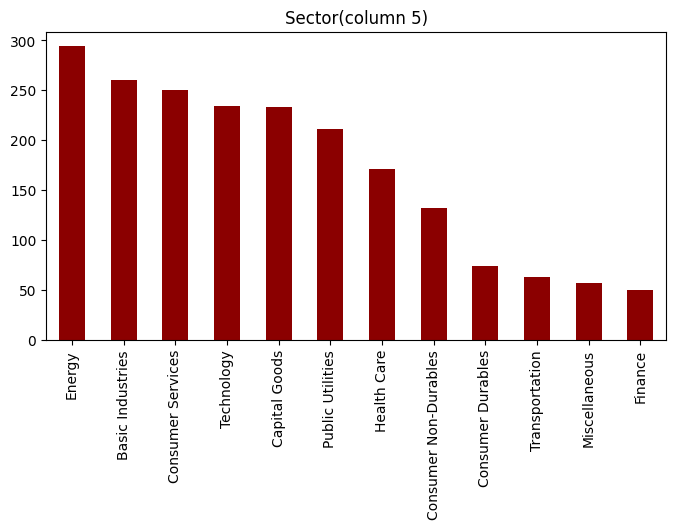

In [32]:
dataset['Sector'].value_counts().plot(kind='bar',figsize=(8,4), title="Sector(column 5)", color="darkred")

Plotting the correlation matrix between the independent variables

In [33]:
def plotCorrelationMatrix(dataset, graphWidth):
    filename = dataset.dataframeName
    dataset = dataset.dropna('columns') # drop columns with NaN
    dataset = dataset[[col for col in dataset if dataset[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if dataset.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({dataset.shape[1]}) is less than 2')
        return
    corr = dataset.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

<ipython-input-33-9ef65d2da4af>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dataset = dataset.dropna('columns') # drop columns with NaN
<ipython-input-33-9ef65d2da4af>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


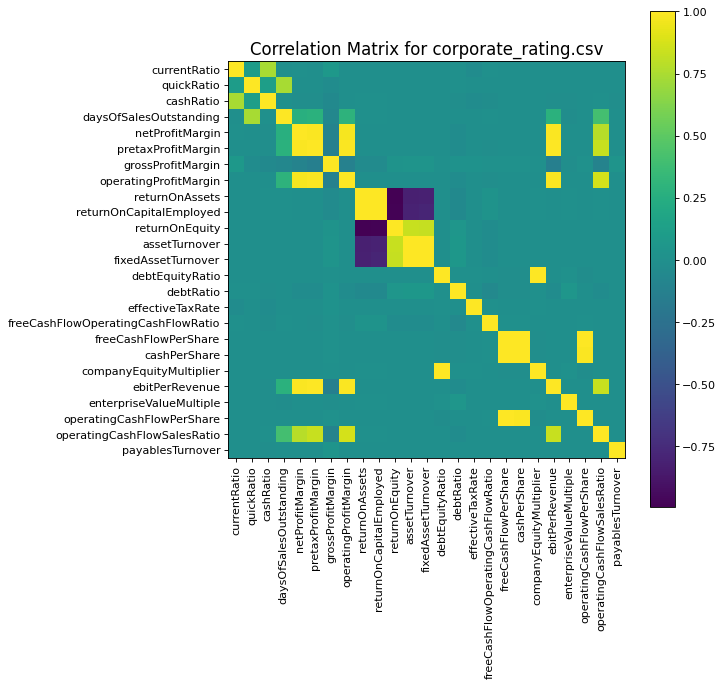

In [34]:
plotCorrelationMatrix(dataset, 8)

Plotting Scatter plots for 10 columns with thier correlation values as labels

In [35]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.6, 0.15), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-35-609c1a44b8c7>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


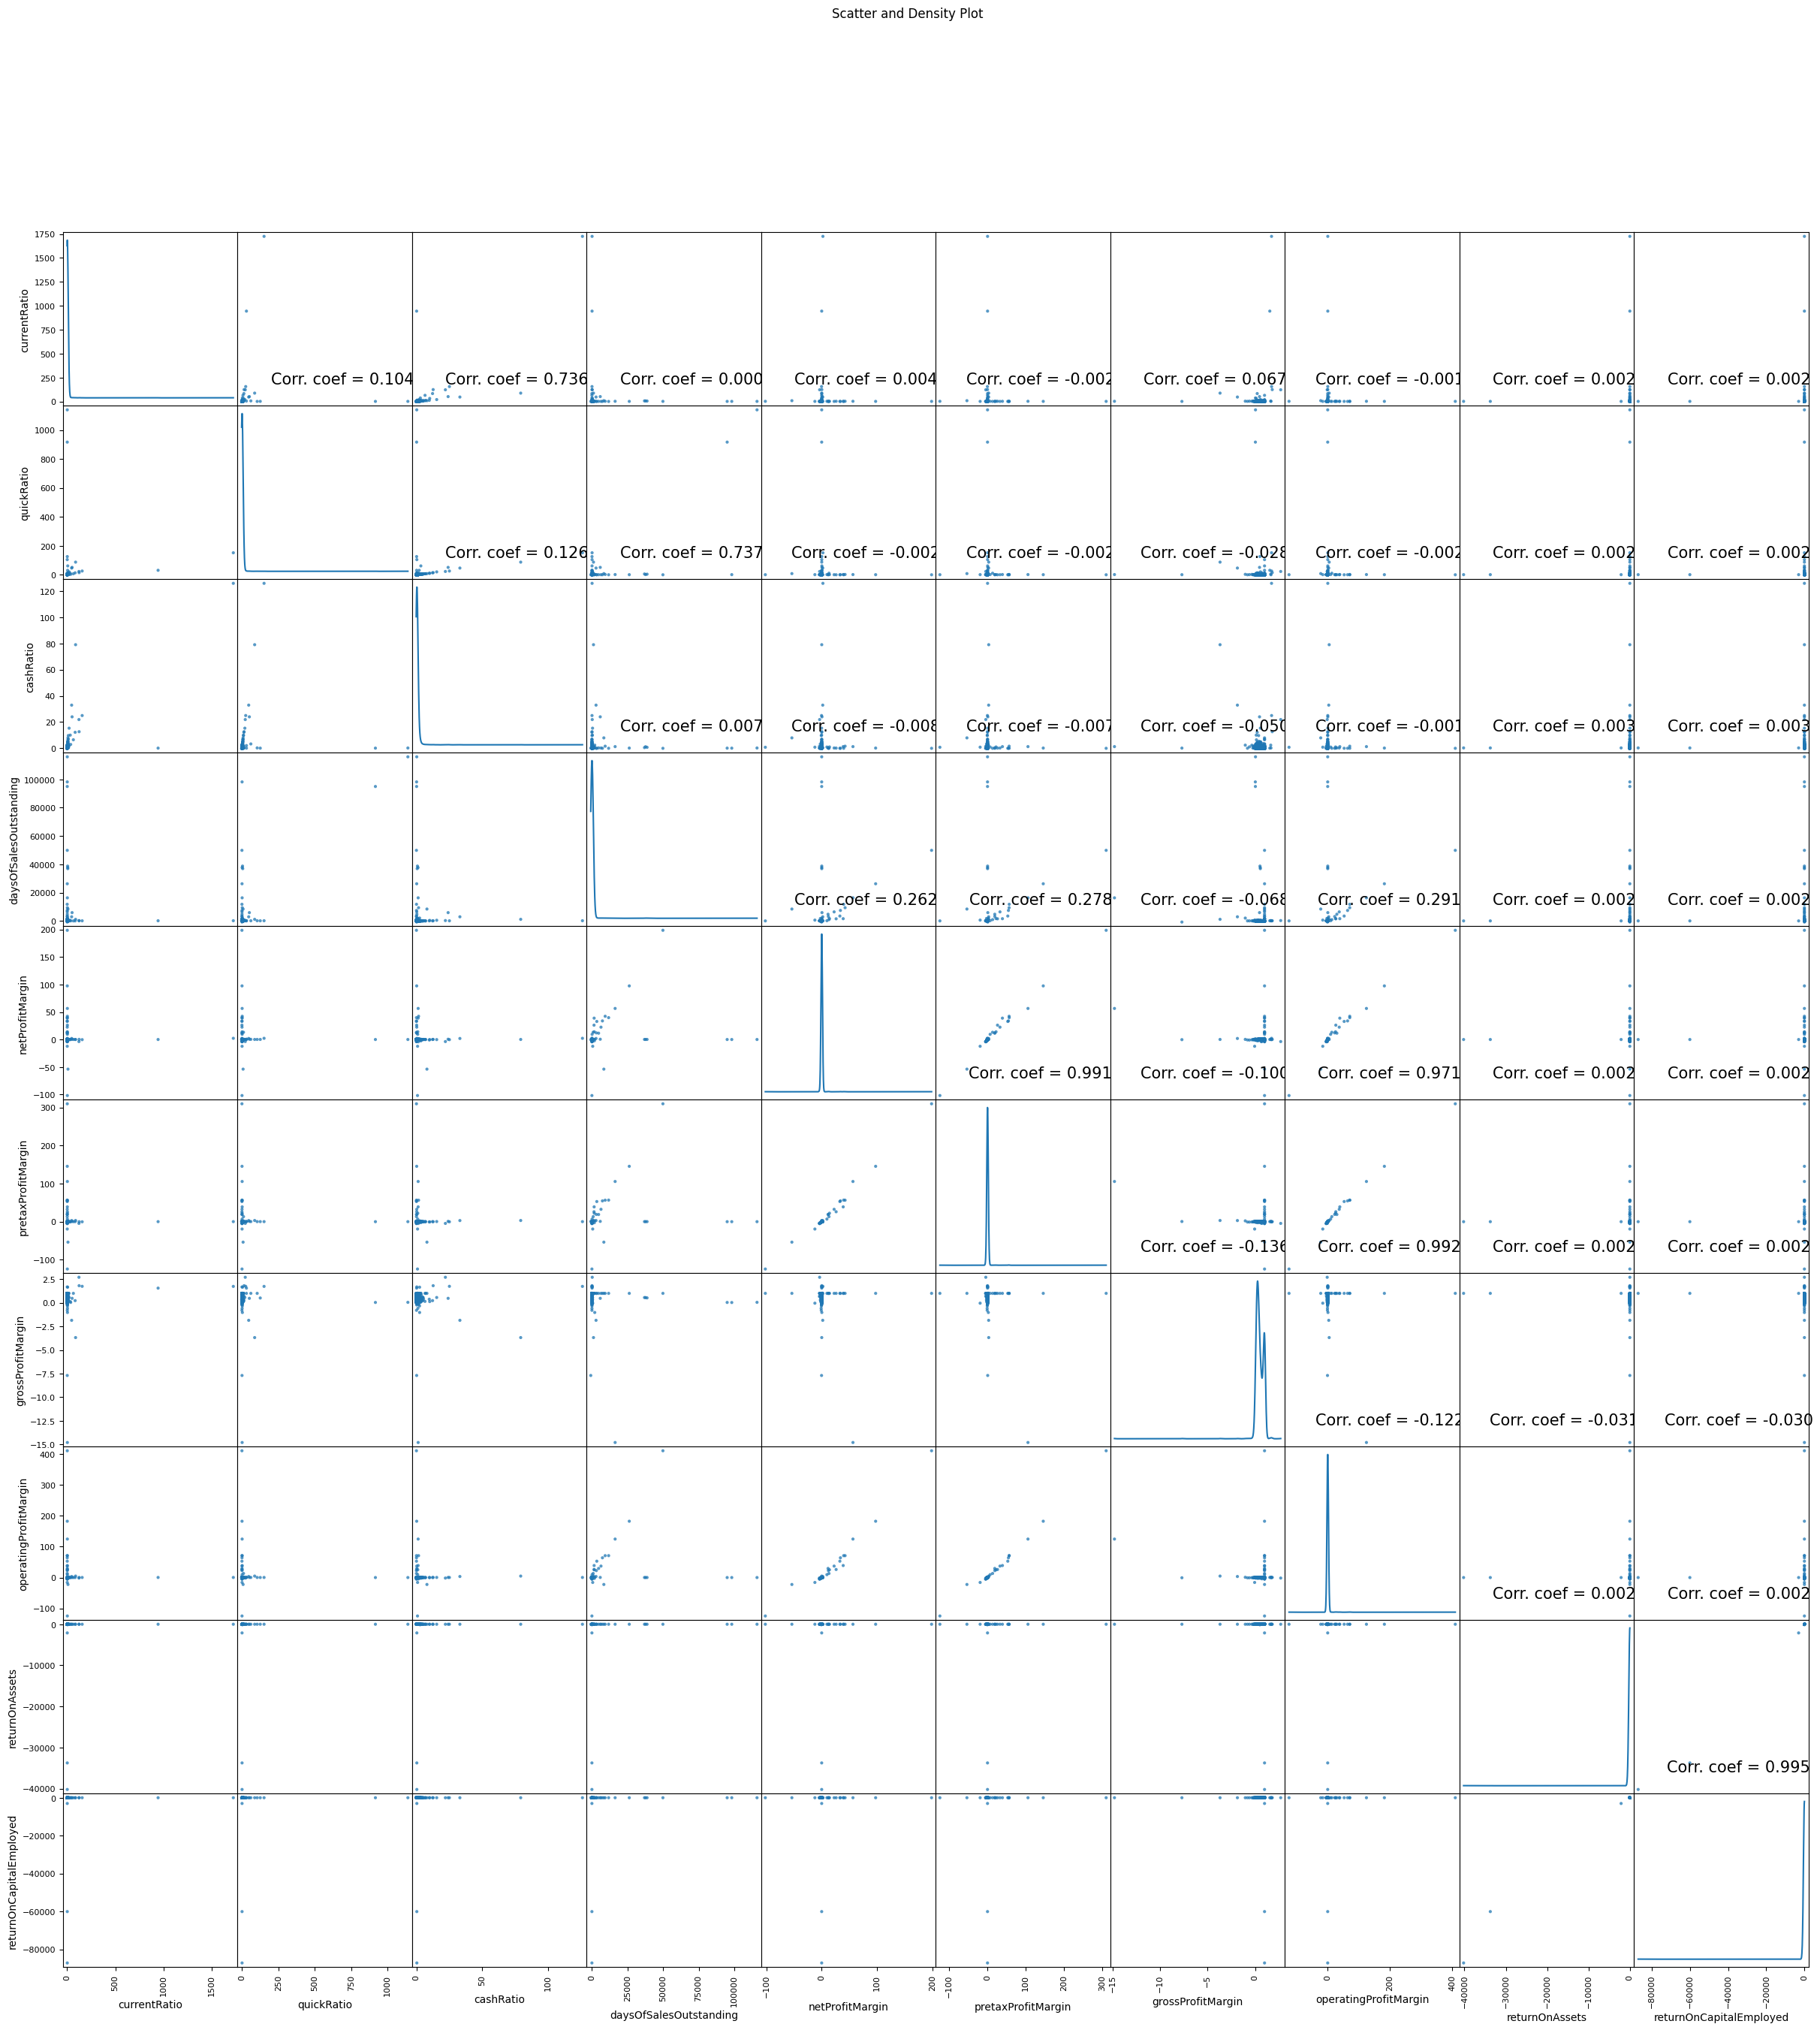

In [36]:
plotScatterMatrix(dataset, 30, 15)

Descriptive Statistics

There are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function describe() returns information about the distribution of the data such as quantiles, min and max.

In [37]:
dataset.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


Skewness and Outliers


We observe a lot of skewness in the data with this first exploration. In this case, it means that most variables in the dataset may have presence of outliers. Taking as observation the table above the first column:

currentRatio: This 50% of its variables between 1.071 and 2.166891. The minimum value is -0.932005 however the maximum value is 1725.505005. It means there is a giant outlier that is extremely distant from most points from the data (currentRatio).
The same pattern can be observed in the following columns such as quickRatio, cashRatio, daysOfSalesOutstanding, netProfitMargin and so on.

To observe how this reflect on the distribution of the data below are some plots of variables chosen randomly.

In [38]:
from random import sample
column_list = list(dataset.columns[6:31])
column_list = sample(column_list,4) 
print(column_list)

['returnOnCapitalEmployed', 'quickRatio', 'returnOnAssets', 'companyEquityMultiplier']


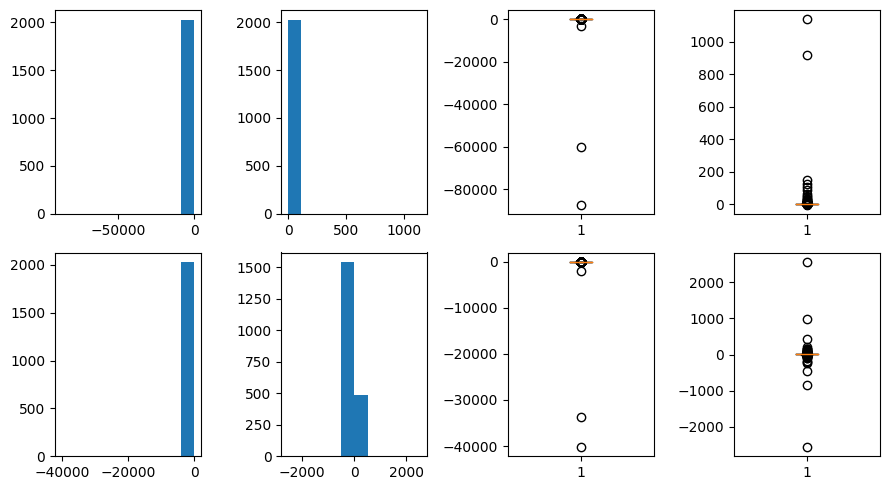

In [39]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(dataset[column_list[0]])
axes[0, 1].hist(dataset[column_list[1]])
axes[1, 0].hist(dataset[column_list[2]])
axes[1, 1].hist(dataset[column_list[3]])

axes[0, 2].boxplot(dataset[column_list[0]])
axes[0, 3].boxplot(dataset[column_list[1]])
axes[1, 2].boxplot(dataset[column_list[2]])
axes[1, 3].boxplot(dataset[column_list[3]])

figure.tight_layout()

As predicted, the data is comtaminated by outliers. We cannot observe real behaviour of the distribution because some points differ too much from the others. We will use the function .skew from pandas in all columns. It should return between 0 and 1 if a column is normally distributed.

In [40]:
dataset.skew(axis=0)

<ipython-input-40-8dd55cf8cf25>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew(axis=0)


currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

We observe this is a generalized problem. As we can see almost all columns are extremely skewed. The following code will return the proportion of outliers in each column .

In [41]:
for c in dataset.columns[6:31]:

    q1 = dataset[c].quantile(0.25)
    q3 = dataset[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(dataset.loc[(dataset[c] < fence_low)  ,c])
    upper_out = len(dataset.loc[(dataset[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(dataset)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 17.79%
quickRatio : 19.12%
cashRatio : 14.79%
daysOfSalesOutstanding : 23.66%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.13%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 21.98%
returnOnEquity : 28.59%
assetTurnover : 16.02%
fixedAssetTurnover : 13.41%
debtEquityRatio : 22.13%
debtRatio : 21.19%
effectiveTaxRate : 28.09%
freeCashFlowOperatingCashFlowRatio : 17.05%
freeCashFlowPerShare : 23.51%
cashPerShare : 17.05%
companyEquityMultiplier : 21.98%
ebitPerRevenue : 24.35%
enterpriseValueMultiple : 23.71%
operatingCashFlowPerShare : 17.69%
operatingCashFlowSalesRatio : 17.00%
payablesTurnover : 14.44%


Most columns have a significant number of outliers. However it is not clear for us if there are a few rows that all outliers or each of the rows may be contributing individually with some outliers. the below code checks by row the distribution of outliers. We will create a new dataframe as dataset_outlier that will be used with this purpose. In this dataframe every cell will become 1 if the corresponding cell is an outlier in dataset and 0 if it is not.

In [42]:
dataset_outlier = dataset.copy()

for c in dataset_outlier.columns[6:31]:
    
    q1 = dataset_outlier[c].quantile(0.25)
    q3 = dataset_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    #try:
    for i in range(len(dataset_outlier)):
      if dataset.loc[i,c] < fence_low or dataset.loc[i,c] > fence_high: # if Outlier
          dataset_outlier.loc[i,c] = 1
      else: # Not Outlier
         dataset_outlier.loc[i,c] = 0
    # except KeyError:
    #   print('The key "111" does not exist in the index.')

    


In [43]:
dataset_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03/06/15,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<ipython-input-44-dcc389ee93b7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_outlier["total"] = dataset_outlier.sum(axis=1)


<Axes: >

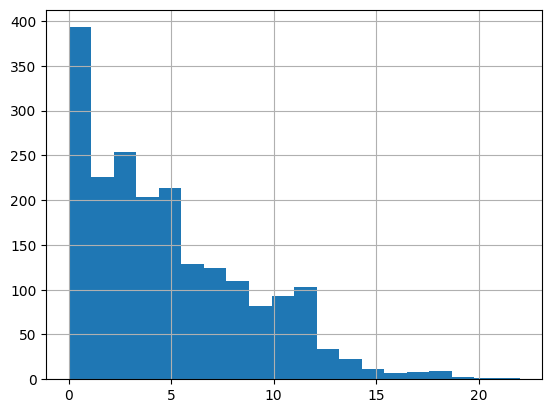

In [44]:
dataset_outlier["total"] = dataset_outlier.sum(axis=1)
dataset_outlier.total.hist(bins = 20)

Only up to 400 rows don't have any outliers. Most rows have outliers and maybe they will be useful in the further classification tasks. Therefore we see no value in excluding the outliers from the dataset.

In [45]:
#Dropping the less values categories
dataset.drop(dataset.index[(dataset["Rating"] == "AAA")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["Rating"] == "CC")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["Rating"] == "C")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["Rating"] == "D")],axis=0,inplace=True)

X_df = dataset.iloc[:, 5:31]
y_df = dataset.iloc[:, 0]

In [46]:
#Label encoding Sector column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
y = le1.fit_transform(y_df)
X_df.Sector = le.fit_transform(X_df.Sector)

In [47]:
X=X_df.to_numpy()

In [48]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
#choosing the most optimal features
from sklearn.decomposition import PCA
pca = PCA(n_components = 23)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [50]:
#Transforming the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Plotting again after transforming the dataset again

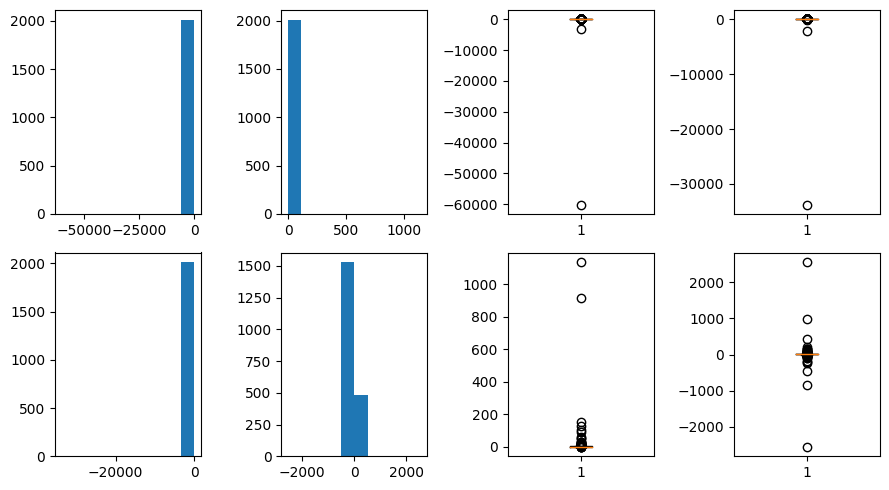

In [51]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(dataset[column_list[0]])
axes[0, 1].hist(dataset[column_list[1]])
axes[1, 0].hist(dataset[column_list[2]])
axes[1, 1].hist(dataset[column_list[3]])

axes[0, 2].boxplot(dataset[column_list[0]])
axes[1, 2].boxplot(dataset[column_list[1]])
axes[0, 3].boxplot(dataset[column_list[2]])
axes[1, 3].boxplot(dataset[column_list[3]])

figure.tight_layout()

In [52]:
df_rating_no_out = dataset.copy()

for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)

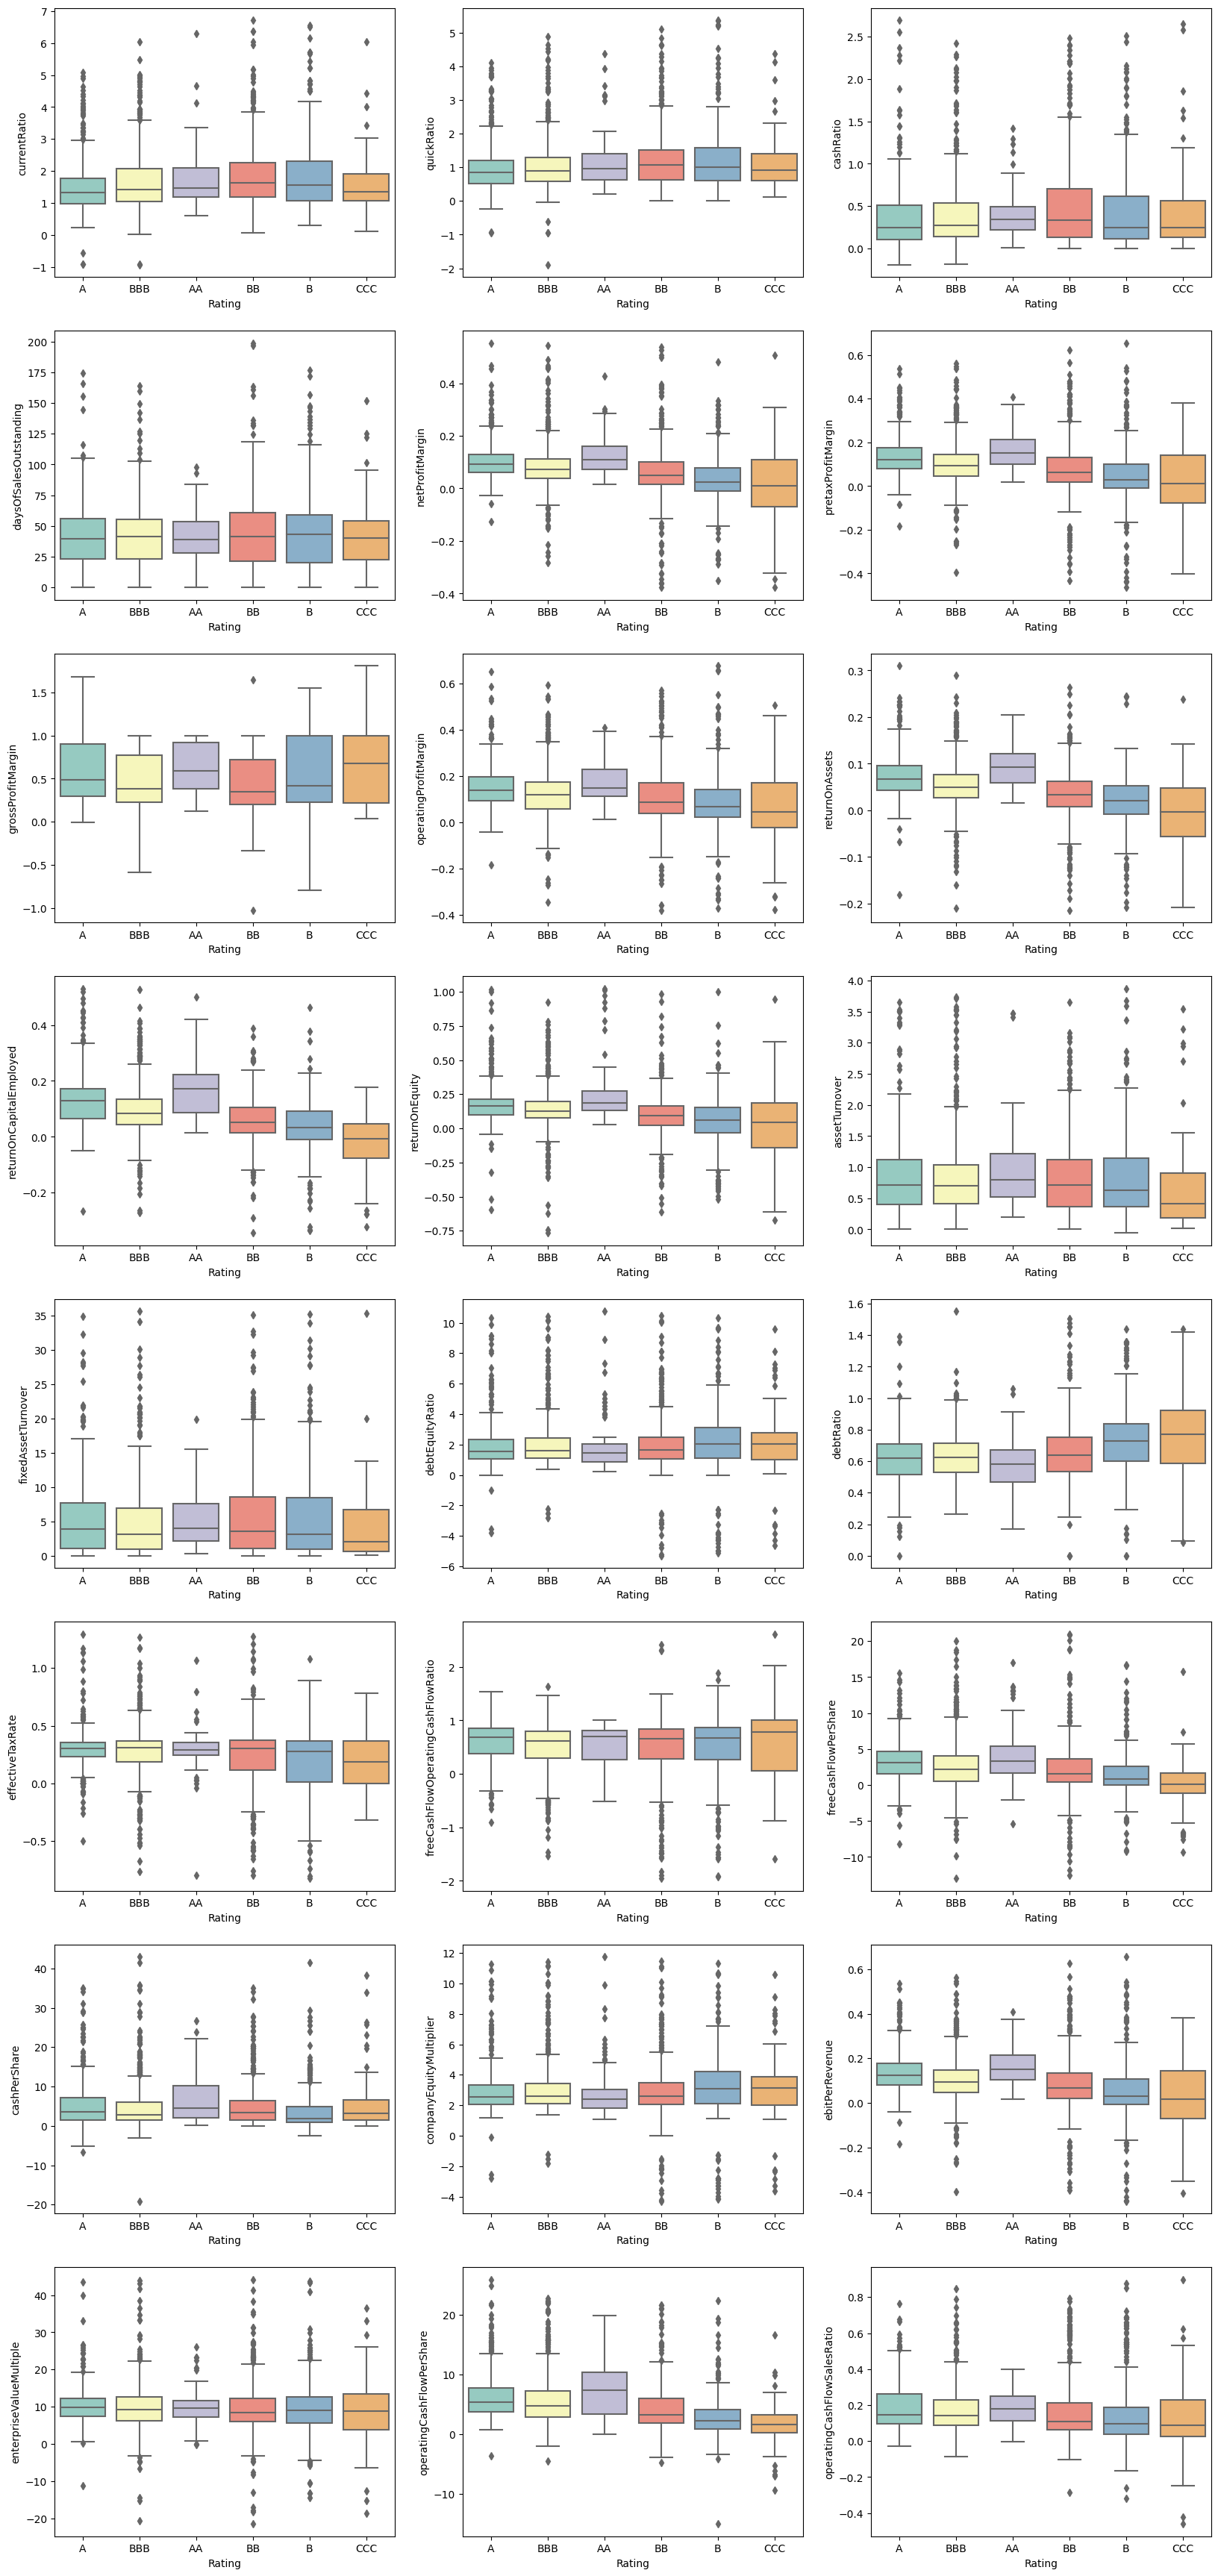

In [55]:
import seaborn as sns
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df_rating_no_out.columns[6:30]:
    
    sns.boxplot(x=df_rating_no_out.Rating, y=df_rating_no_out[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1    


The below code will test a range of models. In each we will fit the model in the train data, make predictons for the test data and obtain the accuracy. In later steps we will compare the accuracy of all the models. 

Logistic Regression

In [56]:
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    penalty="l2",
    solver="newton-cg",
    multi_class="multinomial",
    random_state=0,
    max_iter=1000,
    C=0.1,
)


# Recursive Feature Selection with cross-validation
# rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring="accuracy")
# rfecv.fit(X_train, y_train)

# shows the features selected with - true
# print("support", rfecv.support_)

# X = X[:, rfecv.support_]


# Print the optimal number of features
# print("Optimal number of features : %d" % rfecv.n_features_)



# training the model
start_time = time.time()
model.fit(X_train, y_train)




LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   random_state=0, solver='newton-cg')

In [57]:
y_pred = model.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))

[['BBB' 'BBB']
 ['BBB' 'A']
 ['BBB' 'BBB']
 ...
 ['BBB' 'BB']
 ['BBB' 'CCC']
 ['B' 'AA']]


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 25.28137942668342
Recall: 20.560113290351314
F1-score: 16.474273303887905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import accuracy_score
Accuracy_LR=accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression: ",Accuracy_LR)

Accuracy score for Logistic Regression:  0.3630952380952381


In [60]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_LR= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.131224 seconds


K-Nearest Neighbour 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
start_time = time.time()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))

[['BBB' 'BBB']
 ['A' 'A']
 ['BB' 'BBB']
 ...
 ['AA' 'BB']
 ['BB' 'CCC']
 ['B' 'AA']]


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 39.89282973984458
Recall: 34.00846224171231
F1-score: 34.649422726370595


In [64]:
from sklearn.metrics import accuracy_score
Accuracy_KNN=accuracy_score(y_test, y_pred)
print("Accuracy score for K-NN: ",Accuracy_KNN)

Accuracy score for K-NN:  0.4126984126984127


In [65]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_KNN= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.168844 seconds


Decision Tree Classification

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))

[['BBB' 'BBB']
 ['A' 'A']
 ['A' 'BBB']
 ...
 ['BB' 'BB']
 ['B' 'CCC']
 ['B' 'AA']]


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 37.78251158536614
Recall: 37.91075611597945
F1-score: 37.743095963375126


In [69]:
from sklearn.metrics import accuracy_score
Accuracy_DT=accuracy_score(y_test, y_pred)
print("Accuracy score for Decision tree: ",Accuracy_DT)

Accuracy score for Decision tree:  0.42857142857142855


In [70]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_DT=execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.226186 seconds


Support Vector Machine

In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
start_time = time.time()
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [72]:
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))

[['BBB' 'BBB']
 ['BBB' 'A']
 ['BBB' 'BBB']
 ...
 ['BBB' 'BB']
 ['BBB' 'CCC']
 ['BB' 'AA']]


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 26.0721726701533
Recall: 19.46684005147126
F1-score: 14.399730410960181


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.metrics import accuracy_score
Accuracy_SVM=accuracy_score(y_test, y_pred)
print("Accuracy score for SVM: ",Accuracy_SVM)

Accuracy score for SVM:  0.3531746031746032


In [75]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_SVM= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.639983 seconds


Kernel Support Vector Machine 

In [76]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
start_time = time.time()
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [77]:
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))

[['BBB' 'BBB']
 ['BBB' 'A']
 ['BBB' 'BBB']
 ...
 ['BBB' 'BB']
 ['BBB' 'CCC']
 ['B' 'AA']]


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 20.065789473684212
Recall: 19.245367963410867
F1-score: 13.792167404596247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.metrics import accuracy_score
Accuracy_KSV=accuracy_score(y_test, y_pred)
print("Accuracy score for Kernel SVM: ",Accuracy_KSV)

Accuracy score for Kernel SVM:  0.3492063492063492


In [80]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_KSV= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.529186 seconds


Random Forest Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1234)
start_time = time.time()
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1234)

In [82]:
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))


[['BBB' 'BBB']
 ['A' 'A']
 ['BBB' 'BBB']
 ...
 ['BB' 'BB']
 ['BBB' 'CCC']
 ['B' 'AA']]


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 43.99530258459153
Recall: 38.400550712334436
F1-score: 39.45230879515744


In [84]:
from sklearn.metrics import accuracy_score
Accuracy_RF=accuracy_score(y_test, y_pred)
print("Accuracy score for Random Forest Classification: ",Accuracy_RF)

Accuracy score for Random Forest Classification:  0.498015873015873


In [85]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_RF= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 0.281813 seconds


XG Boost Classification

In [86]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [87]:
#Transforming the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
start_time = time.time()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(np.concatenate((le1.inverse_transform(y_pred).reshape(len(y_pred),1), le1.inverse_transform(y_test).reshape(len(y_test),1)),1))
# cm = confusion_matrix(y_test, y_pred)
# print(cm)


[['BBB' 'BBB']
 ['A' 'A']
 ['BBB' 'BBB']
 ...
 ['BB' 'BB']
 ['BB' 'CCC']
 ['A' 'AA']]


In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# print the precision, recall, and F1-score
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 51.310083141893536
Recall: 44.777877928223205
F1-score: 46.63132295627321


In [91]:
from sklearn.metrics import accuracy_score
Accuracy_XGB=accuracy_score(y_test, y_pred)
print("Accuracy score for XG Boost Classification: ",Accuracy_XGB)

Accuracy score for XG Boost Classification:  0.5575396825396826


In [92]:
end_time = time.time()
execution_time = end_time - start_time

print()
EsTime_XGB= execution_time
print(f"Execution time: {execution_time:.6f} seconds")
#print(f"Time complexity: {X.shape[0] * X.shape[1] * np.log(model.n_neighbors):.6f}")


Execution time: 5.283002 seconds


Comparing Results

In [93]:
accuracy_list = [Accuracy_LR, Accuracy_KNN, Accuracy_DT, Accuracy_SVM, Accuracy_KSV, Accuracy_RF, 
                 Accuracy_XGB]

model_list = ['Logistic Regression', 'K-Nearest neighbour', 'Decision Tree', 'Support Vector Machine', 
              "Kernel Support Vector Machine", 'Random Forest', 'XG Boost']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

<ipython-input-94-76bff3b19268>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


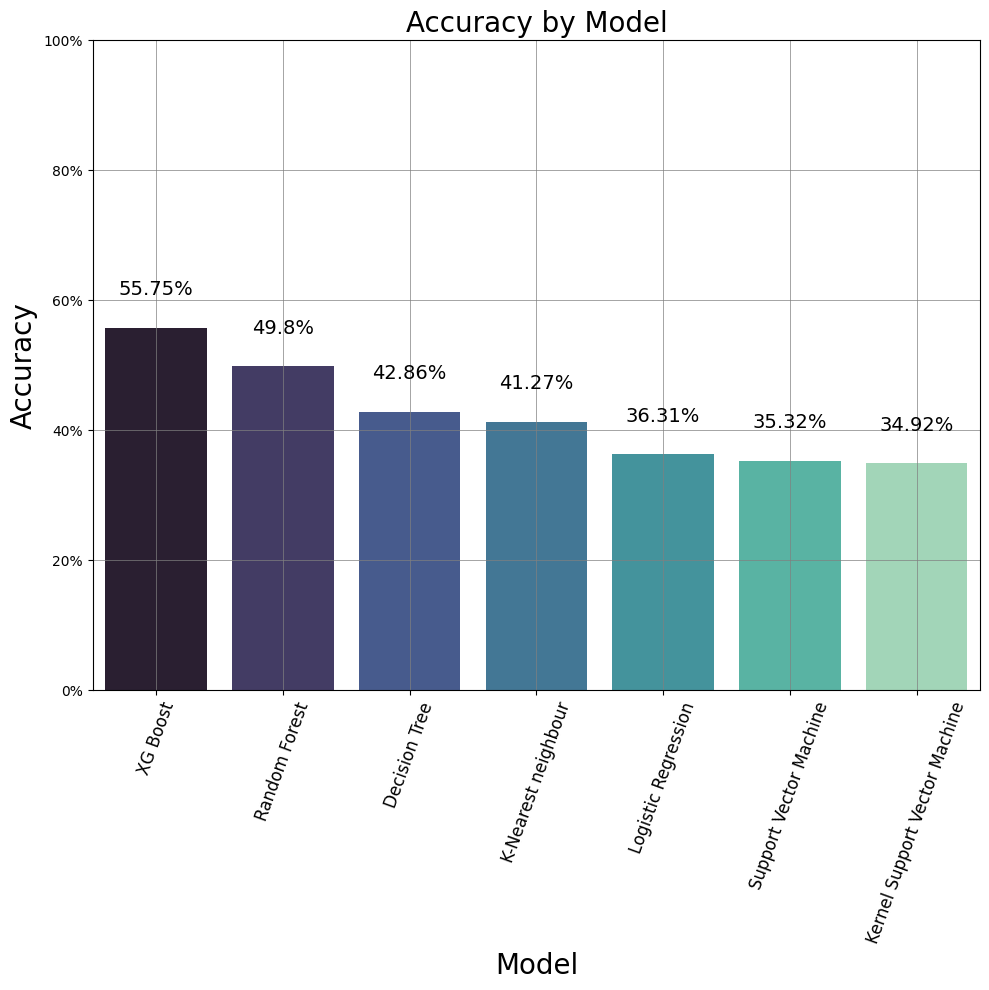

In [94]:
import seaborn as sns
import matplotlib.ticker as mtick
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(10,10))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="mako")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')
ax=axes[0,1]
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()

In [95]:
Est_time_list = [EsTime_LR, EsTime_KNN, EsTime_DT, EsTime_SVM, EsTime_KSV, EsTime_RF, 
                 EsTime_XGB]

model_list = ['Logistic Regression', 'K-Nearest neighbour', 'Decision Tree', 'Support Vector Machine', 
              "Kernel Support Vector Machine", 'Random Forest', 'XG Boost']

df_EsTime = pd.DataFrame({'Model': model_list, 'Estimation Time': Est_time_list})

<ipython-input-96-b3c2876eefaa>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


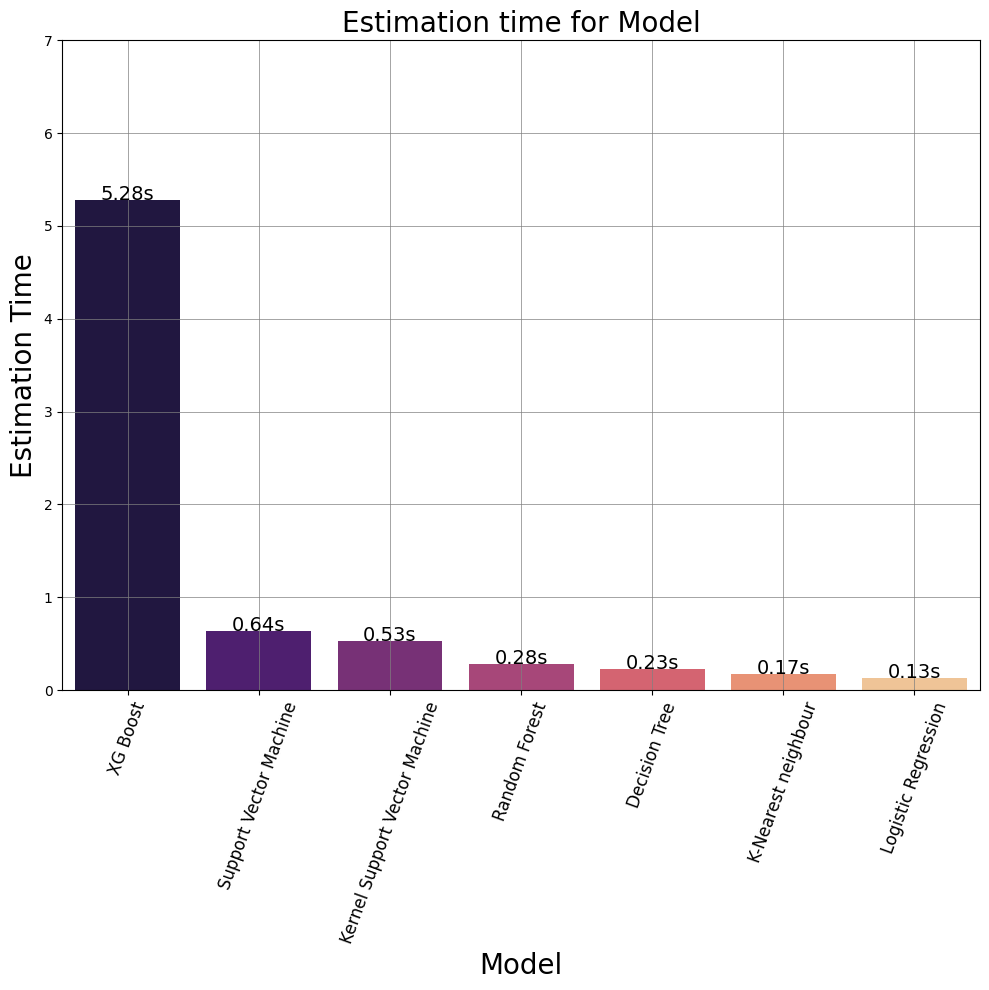

In [96]:
import seaborn as sns
import matplotlib.ticker as mtick
order = list(df_EsTime.sort_values('Estimation Time', ascending=False).Model)
df_EsTime = df_EsTime.sort_values('Estimation Time', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(10,10))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Estimation Time", data=df_EsTime, order = order, palette="magma")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Estimation Time", fontsize=20)
plt.title("Estimation time for Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,7)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_EsTime.loc[i, 'Estimation Time'] , s = str(round((df_EsTime.loc[i, 'Estimation Time']), 2))+'s', 
             fontsize = 14, color='black',horizontalalignment='center')
ax=axes[0,1]
y_value=['{:,.2f}'.format(x) + 's' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()